In [1]:
#Pacotes necessários:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
# Ações que serão usadas:
tickers = ['CPLE3.SA', 'CMIG4.SA', 'CESP6.SA', 'CPLE6.SA','TAEE11.SA','CMIG3.SA','ENBR3.SA','CPFE3.SA','^BVSP']

# Set up End and Start times for data grab
end = '2021-01-01'
start = '2015-01-01'

for stock in tickers:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

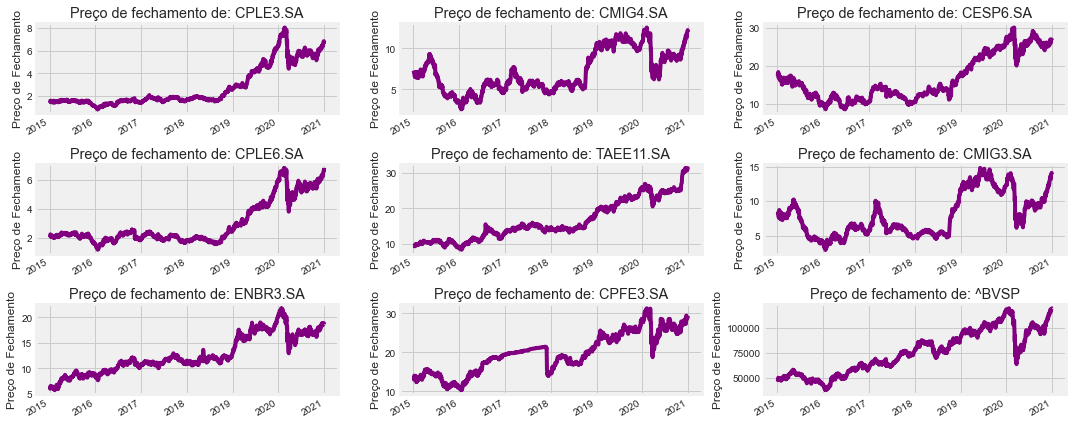

In [3]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tickers, 1):
    plt.subplot(3, 3, i)
    globals()[company]['Adj Close'].plot(color='purple')
    plt.ylabel('Preço de Fechamento')
    plt.xlabel(None)
    plt.title(f"Preço de fechamento de: {tickers[i - 1]}")
    
plt.tight_layout()

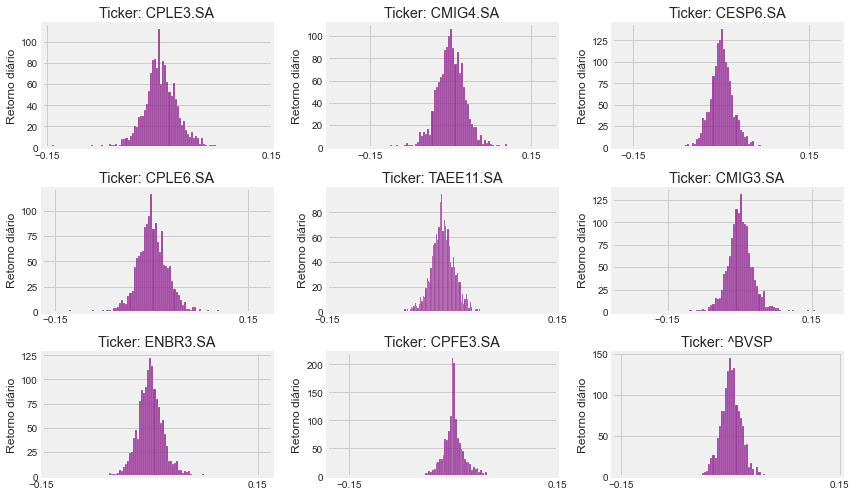

In [4]:
for company in tickers:
    globals()[company]['Daily Return'] = globals()[company]['Adj Close'].pct_change()

plt.figure(figsize=(12, 7))

for i, company in enumerate(tickers, 1):
    plt.subplot(3, 3, i)
    sns.histplot(globals()[company]['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Retorno diário')
    plt.title(f'Ticker: {tickers[i - 1]}')
    plt.xlabel(None)
    plt.xticks([-0.15,0.15])

plt.tight_layout()

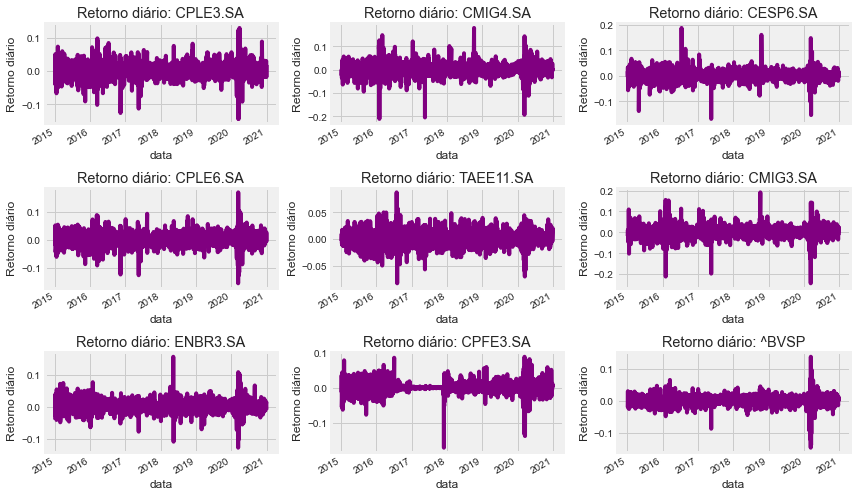

In [5]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(tickers, 1):
    plt.subplot(3, 3, i)
    globals()[company]['Daily Return'].dropna().plot(color='purple')
    plt.ylabel('Retorno diário')
    plt.title(f'Retorno diário: {tickers[i - 1]}')
    plt.xlabel("data")

plt.tight_layout()

In [6]:
# Preço de fechamento
# Ações que serão usadas:
tickers = ['CPLE3.SA', 'CMIG4.SA', 'CESP6.SA', 'CPLE6.SA','TAEE11.SA','CMIG3.SA','ENBR3.SA','CPFE3.SA','^BVSP']

# Set up End and Start times for data grab
end = '2021-01-01'
start = '2014-12-30'

closing_df = DataReader(tickers, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
Date,,,,,,,,,
2014-12-30,1.662660,7.484931,18.633307,2.329149,9.380158,8.605817,6.327260,13.963341,50007.0
2015-01-02,1.601228,7.291256,17.467863,2.169249,9.385139,8.387552,6.234422,13.190901,48512.0
2015-01-05,1.535790,7.103280,17.791983,2.122370,9.350287,8.237885,5.984474,13.020072,47517.0
2015-01-06,1.512419,7.040621,17.736813,2.122370,9.365224,8.231650,6.084454,13.257751,48001.0
2015-01-07,1.589209,7.040621,18.336777,2.233466,9.380158,8.325192,6.320118,13.725667,49463.0


In [7]:
closing_df.describe()

Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1483.000000
mean,2.768367,7.102108,16.577263,2.926926,16.379674,7.882432,12.609813,19.806695,75304.155765
std,1.790965,2.470084,5.893319,1.459619,5.575625,3.070581,3.692210,5.054961,21420.299993
min,0.835830,2.588987,8.630638,1.170555,8.330639,2.949538,5.698819,10.301681,37497.000000
25%,1.565223,5.204660,11.903667,1.945060,11.579984,5.340653,10.190619,15.391544,56300.500000
50%,1.765563,6.126120,14.238410,2.206578,14.465466,6.727837,11.580251,19.716925,74519.000000
75%,4.203349,9.183789,22.431316,4.029703,21.514774,9.860750,16.302670,24.140793,95358.000000
max,8.028678,12.517577,30.113850,6.799857,31.348425,14.835049,21.765215,31.278265,119528.000000


In [8]:
rets = closing_df.pct_change()
rets.head()

Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
Date,,,,,,,,,
2014-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.036948,-0.025875,-0.062546,-0.068652,0.000531,-0.025362,-0.014673,-0.055319,-0.029896
2015-01-05,-0.040867,-0.025781,0.018555,-0.021610,-0.003713,-0.017844,-0.040092,-0.012951,-0.020510
2015-01-06,-0.015217,-0.008821,-0.003101,0.000000,0.001597,-0.000757,0.016706,0.018255,0.010186
2015-01-07,0.050773,0.000000,0.033826,0.052345,0.001595,0.011364,0.038732,0.035294,0.030458


In [9]:
rets_mult = rets+1
rets_mult = rets_mult.dropna()
simula_cada = rets_mult.cumprod()
simula_cada

Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
Date,,,,,,,,,
2015-01-02,0.963052,0.974125,0.937454,0.931348,1.000531,0.974638,0.985327,0.944681,0.970104
2015-01-05,0.923695,0.949011,0.954848,0.911221,0.996816,0.957246,0.945824,0.932447,0.950207
2015-01-06,0.909639,0.940639,0.951888,0.911221,0.998408,0.956522,0.961625,0.949468,0.959886
2015-01-07,0.955823,0.940639,0.984086,0.958919,1.000000,0.967391,0.998871,0.982979,0.989122
2015-01-08,0.955422,0.933029,0.988157,0.950096,1.009554,0.952174,1.027088,1.003192,0.998720
...,...,...,...,...,...,...,...,...,...
2020-12-22,3.885948,1.555127,1.399511,2.703216,3.265570,1.577152,2.927723,2.065861,2.326634
2020-12-23,3.987453,1.592180,1.425300,2.784690,3.264579,1.603799,2.932226,2.052973,2.356810
2020-12-28,4.107003,1.630357,1.447120,2.849720,3.331952,1.640317,2.975743,2.075526,2.380687


In [10]:
simula_cada.describe()

Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000
mean,1.665470,0.948820,0.889583,1.256823,1.746706,0.915886,1.993602,1.418759,1.505979
std,1.077393,0.330116,0.316372,0.626850,0.594291,0.356916,0.583168,0.361976,0.427484
min,0.502707,0.345893,0.463183,0.502568,0.888113,0.342738,0.900677,0.737766,0.749835
25%,0.941212,0.695317,0.638520,0.834962,1.234680,0.620473,1.610590,1.102566,1.130932
50%,1.061891,0.818285,0.763539,0.947357,1.542135,0.781375,1.830767,1.412049,1.489851
75%,2.528360,1.227043,1.204849,1.730929,2.293859,1.146070,2.577327,1.728869,1.906633
max,4.828817,1.672370,1.616130,2.919460,3.341993,1.723840,3.439912,2.240027,2.390225


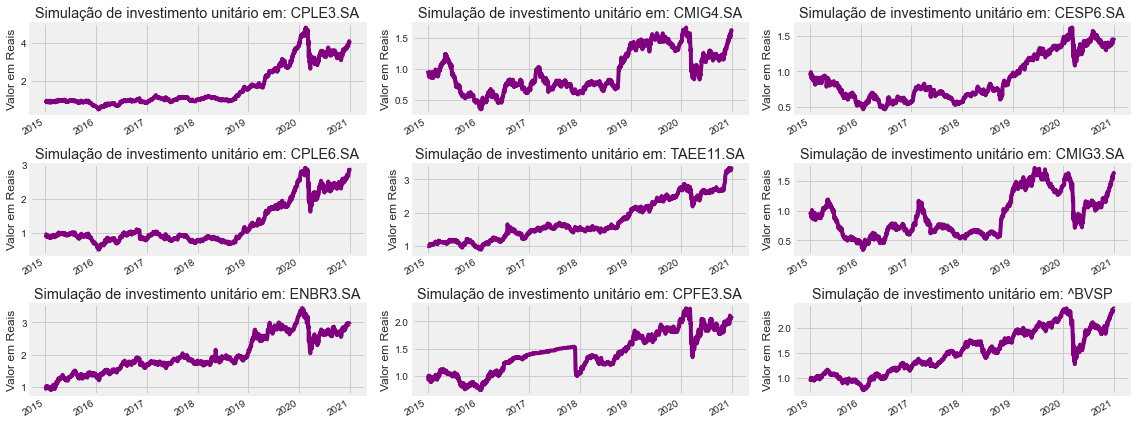

In [11]:
plt.figure(figsize=(16, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tickers, 1):
    plt.subplot(3, 3, i)
    simula_cada[company].plot(color='purple')
    plt.ylabel('Valor em Reais')
    plt.xlabel(None)
    plt.title(f"Simulação de investimento unitário em: {tickers[i - 1]}")
    
plt.tight_layout()

<AxesSubplot:title={'center':'Correlation Matrix'}, xlabel='Symbols', ylabel='Symbols'>

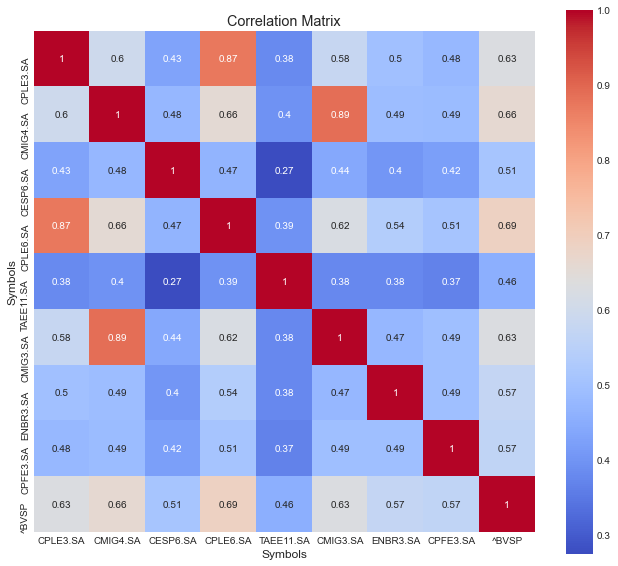

In [12]:
from matplotlib import pyplot
correlation = rets.corr()
pyplot.figure(figsize=(10,10))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

<AxesSubplot:title={'center':'Correlation Matrix'}, xlabel='Symbols', ylabel='Symbols'>

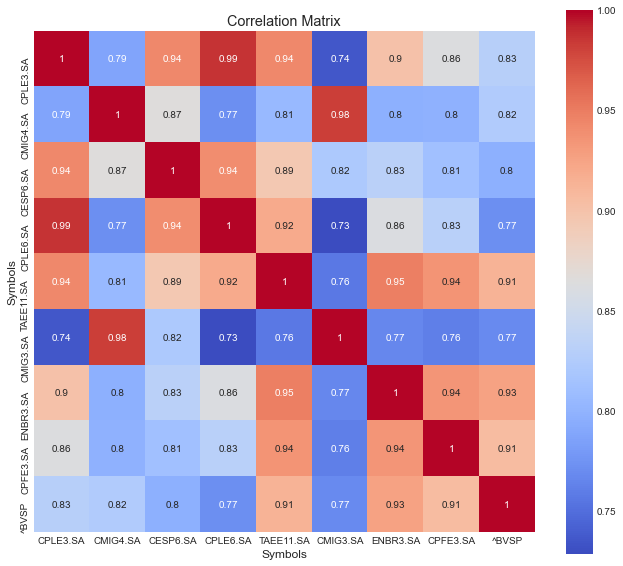

In [13]:
correlation = closing_df.corr()
pyplot.figure(figsize=(10,10))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

In [14]:
# Set up End and Start times for data grab
end = '2021-01-01'
start = '2015-01-01'

volume_dados = DataReader(tickers, 'yahoo', start, end)['Volume']
volume_dados.head() 


Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
Date,,,,,,,,,
2015-01-02,193000.0,4523695.0,808400.0,5026000.0,344100.0,42539.0,1321195.0,1033492.0,2882100.0
2015-01-05,326000.0,4783194.0,981600.0,6695000.0,485100.0,106705.0,1629004.0,1347453.0,3866100.0
2015-01-06,363000.0,3754418.0,745400.0,5331000.0,634700.0,113359.0,1826063.0,788923.0,4559300.0
2015-01-07,330000.0,3907938.0,449200.0,5998000.0,349000.0,148294.0,2189856.0,1229506.0,4408800.0
2015-01-08,256000.0,4940307.0,462500.0,3359000.0,557700.0,46579.0,1470181.0,1249182.0,3621900.0


In [15]:
volume_dados.describe()

Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
count,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.482000e+03
mean,1.268618e+06,1.027761e+07,1.541677e+06,8.563442e+06,1.565689e+06,1.057164e+06,2.415476e+06,1.695706e+06,4.748026e+06
std,1.581013e+06,6.354794e+06,1.504114e+06,6.872795e+06,1.771025e+06,2.287510e+06,1.709697e+06,1.674230e+06,2.648833e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.287500e+05,6.245588e+06,7.689500e+05,5.223500e+06,7.941500e+05,9.850600e+04,1.535650e+06,7.340750e+05,3.190275e+06
50%,7.235000e+05,8.938870e+06,1.178200e+06,7.445500e+06,1.242650e+06,5.390575e+05,2.095300e+06,1.306276e+06,3.887650e+06
75%,1.552250e+06,1.283177e+07,1.794700e+06,1.047375e+07,1.964825e+06,1.444999e+06,2.963734e+06,2.156175e+06,5.191400e+06
max,1.613300e+07,7.657198e+07,2.538320e+07,1.513010e+08,4.019060e+07,6.532065e+07,4.180530e+07,3.209760e+07,1.930000e+07


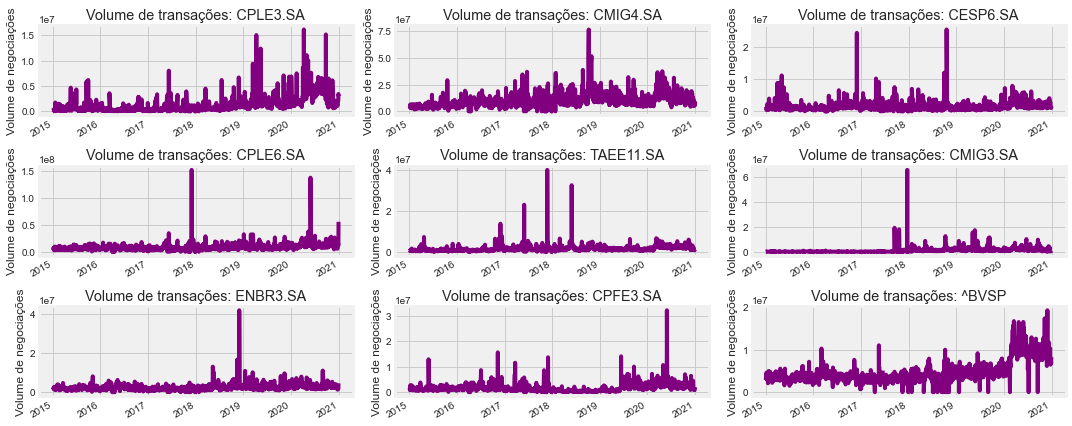

In [16]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tickers, 1):
    plt.subplot(3, 3, i)
    volume_dados[company].plot(color='purple')
    plt.ylabel('Volume de negociações')
    plt.xlabel(None)
    plt.title(f"Volume de transações: {tickers[i - 1]}")
    
plt.tight_layout()

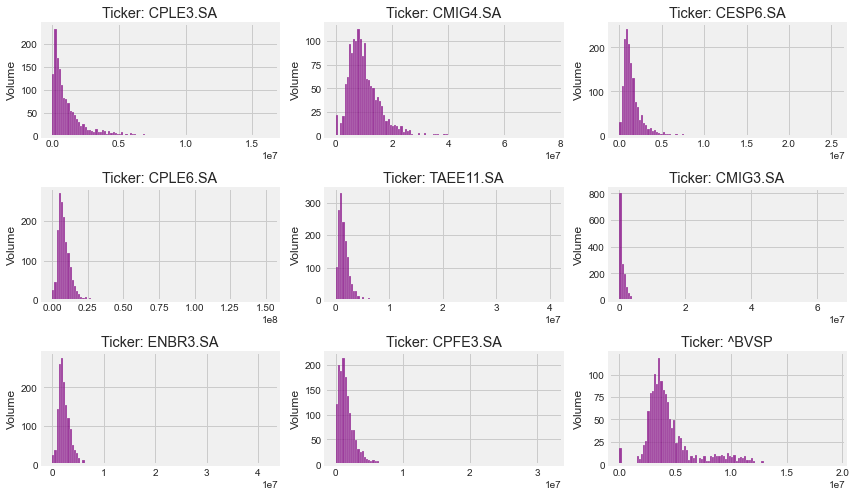

In [17]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(tickers, 1):
    plt.subplot(3, 3, i)
    sns.histplot(globals()[company]['Volume'].dropna(), bins=100, color='purple')
    plt.ylabel('Volume')
    plt.title(f'Ticker: {tickers[i - 1]}')
    plt.xlabel(None)

plt.tight_layout()

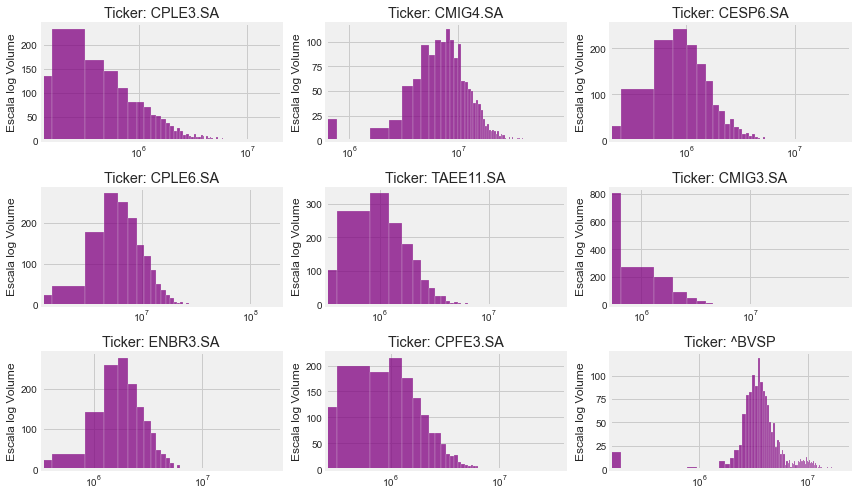

In [18]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(tickers, 1):
    plt.subplot(3, 3, i)
    sns.histplot(globals()[company]['Volume'].dropna(), bins=100, color='purple')
    plt.ylabel('Escala log Volume')
    plt.title(f'Ticker: {tickers[i - 1]}')
    plt.xlabel(None)
    plt.xscale('log')

plt.tight_layout()

In [19]:
weights=np.array([1,1,1,1,1,1,1,1,0])*(1/8)
weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.   ])

In [20]:
cov_matrix=rets.cov()
cov_matrix

Symbols,CPLE3.SA,CMIG4.SA,CESP6.SA,CPLE6.SA,TAEE11.SA,CMIG3.SA,ENBR3.SA,CPFE3.SA,^BVSP
Symbols,,,,,,,,,
CPLE3.SA,0.000619,0.000448,0.000246,0.000561,0.000149,0.000440,0.000248,0.000221,0.000269
CMIG4.SA,0.000448,0.000911,0.000330,0.000511,0.000188,0.000819,0.000296,0.000273,0.000343
CESP6.SA,0.000246,0.000330,0.000529,0.000276,0.000099,0.000308,0.000186,0.000180,0.000201
CPLE6.SA,0.000561,0.000511,0.000276,0.000666,0.000160,0.000491,0.000277,0.000245,0.000305
TAEE11.SA,0.000149,0.000188,0.000099,0.000160,0.000246,0.000181,0.000119,0.000107,0.000123
CMIG3.SA,0.000440,0.000819,0.000308,0.000491,0.000181,0.000931,0.000289,0.000281,0.000330
ENBR3.SA,0.000248,0.000296,0.000186,0.000277,0.000119,0.000289,0.000402,0.000185,0.000197
CPFE3.SA,0.000221,0.000273,0.000180,0.000245,0.000107,0.000281,0.000185,0.000347,0.000181
^BVSP,0.000269,0.000343,0.000201,0.000305,0.000123,0.000330,0.000197,0.000181,0.000294


<AxesSubplot:title={'center':'Matriz de covariância dos retornos'}, xlabel='Symbols', ylabel='Symbols'>

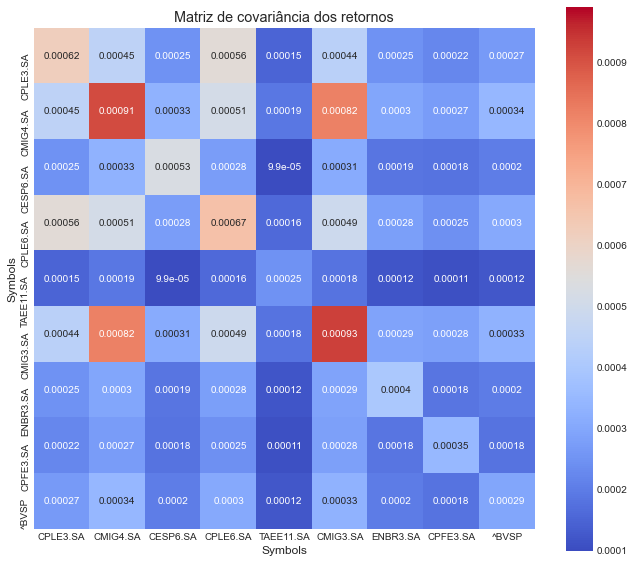

In [21]:
pyplot.figure(figsize=(10,10))
pyplot.title('Matriz de covariância dos retornos')
sns.heatmap(cov_matrix, vmax=0.00099, square=True,annot=True,cmap='coolwarm')

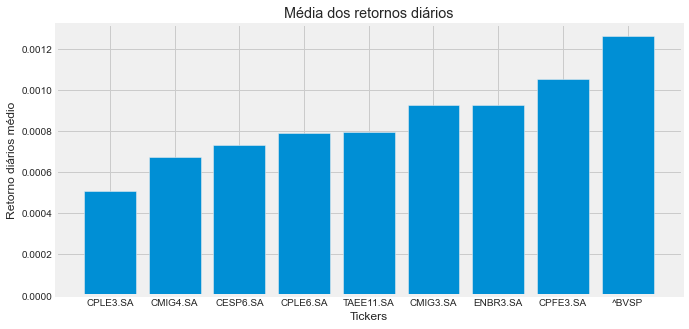

In [22]:

returno_medio = rets.mean().sort_values()

pyplot.figure(figsize=(10,5))
# Create bars
plt.bar(tickers,returno_medio)
plt.title("Média dos retornos diários")
plt.xlabel("Tickers")
plt.ylabel("Retorno diários médio")
plt.show()

Gerando uma carteira aleatória:

In [23]:
# Gerando pesos aleatórios
pesos_ativos = np.random.random(9)
pesos_ativos /= np.sum(pesos_ativos)
pesos_ativos

array([0.13367163, 0.06609012, 0.10583456, 0.14474398, 0.01745544,
       0.10048837, 0.14653165, 0.13499467, 0.15018958])

In [24]:
# Verificação
pesos_ativos.sum()

1.0

In [25]:
# Como verificar a carteira:
datas = rets.index
carteira = np.dot(rets, pesos_ativos)+1

# Create bars
carteira = pd.DataFrame(carteira, index=datas, columns=['Carteira A'])
carteira = carteira.dropna()
carteira


,Carteira A
Date,
2015-01-02,0.960147
2015-01-05,0.979108
2015-01-06,1.003449
2015-01-07,1.034128
2015-01-08,1.005474
...,...
2020-12-22,1.008175
2020-12-23,1.014403
2020-12-28,1.018420


In [26]:
resultado = carteira.cumprod()
resultado

,Carteira A
Date,
2015-01-02,0.960147
2015-01-05,0.940088
2015-01-06,0.943330
2015-01-07,0.975523
2015-01-08,0.980863
...,...
2020-12-22,2.728601
2020-12-23,2.767900
2020-12-28,2.818886


In [27]:
resultado.describe()

,Carteira A
count,1488.000000
mean,1.475260
std,0.593300
min,0.626939
25%,1.045690
50%,1.197293
75%,2.040257
max,2.872795


<Figure size 1080x432 with 0 Axes>

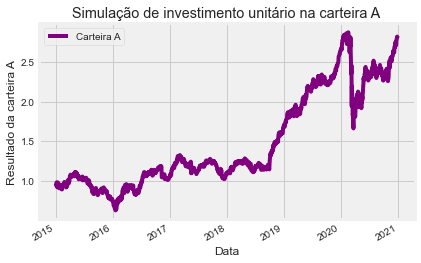

In [28]:
# Carteira Aleatória:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
resultado.plot(color='purple')
plt.ylabel('Resultado da carteira A')
plt.xlabel("Data")
plt.title("Simulação de investimento unitário na carteira A")
plt.show()